In [10]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_portfolio(
    initial_value, expected_return, volatility, days=252, num_simulations=1000
):
    """
    Simulate random portfolio value paths over time.

    Parameters:
    initial_value (float): starting portfolio value
    expected_return (float): expected annual return
    volatility (float): annual volatility
    days (int): number of trading days to simulate
    num_simulations (int): number of Monte Carlo paths

    Returns:
    np.ndarray: simulated portfolio values of shape (days, num_simulations)
    """
    # 1. Convert annual return/vol to daily equivalents
    
    daily_return = (1 + expected_return) ** (1 / 252) - 1
    daily_volatility = (volatility) / np.sqrt(252)
    
    # 2. Generate random daily returns (normal noise)
    
    random_daily_returns = np.random.normal(daily_return, daily_volatility, (days, num_simulations))
        
    # 3. Compute cumulative product to get price paths
    
    portfolio_paths = initial_value * np.cumprod(1 + random_daily_returns, axis = 0)
    
    # 4. Return simulated paths
    
    return portfolio_paths


In [11]:
def plot_monte_carlo_paths(portfolio_paths, num_paths_to_plot=10):
    """
    Plot sample Monte Carlo portfolio paths.

    Parameters:
    portfolio_paths (np.ndarray): simulated portfolio values (days x simulations)
    num_paths_to_plot (int): how many random paths to plot

    Returns:
    None
    """
    # 1. Select random subset of paths to plot
    #    (Hint: np.random.choice on the columns)
    
    random_paths = np.random.choice(portfolio_paths.shape[1], num_paths_to_plot, replace = False)

    # 2. Plot each selected path
    
    for n in random_paths:
        plt.plot(portfolio_paths[:, n], alpha = 0.7)

    # 3. Add labels and title
    
    plt.xlabel("Time (days)")
    plt.ylabel("Portfolio Value")
    plt.title("Monte Carlo paths of portfolio")

    # 4. Show plot
    
    plt.show()


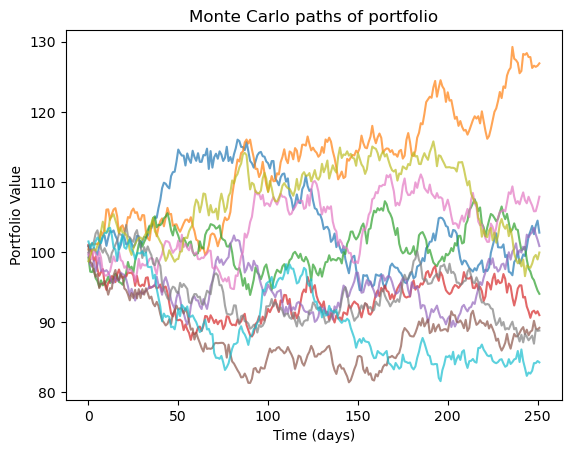

In [12]:
portfolio_paths = monte_carlo_portfolio(100, 0.08, 0.15, 252, 1000)

plot_monte_carlo_paths(portfolio_paths, 10)